In [1]:
#import the necessary Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve
from sklearn.model_selection import KFold # import KFold
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("/content/drive/MyDrive/mlproject")

In [3]:
for c in df.columns:
    print(c, df[c].unique()[:3])

Time ['17:02:00' '1:06:00' '14:15:00']
Day_of_week ['Monday' 'Sunday' 'Friday']
Age_band_of_driver ['18-30' '31-50' 'Under 18']
Sex_of_driver ['Male' 'Female' 'Unknown']
Educational_level ['Above high school' 'Junior high school' nan]
Vehicle_driver_relation ['Employee' 'Unknown' 'Owner']
Driving_experience ['1-2yr' 'Above 10yr' '5-10yr']
Type_of_vehicle ['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)']
Owner_of_vehicle ['Owner' 'Governmental' nan]
Service_year_of_vehicle ['Above 10yr' '5-10yrs' nan]
Defect_of_vehicle ['No defect' nan '7']
Area_accident_occured ['Residential areas' 'Office areas' '  Recreational areas']
Lanes_or_Medians [nan 'Undivided Two way' 'other']
Road_allignment ['Tangent road with flat terrain' nan
 'Tangent road with mild grade and flat terrain']
Types_of_Junction ['No junction' 'Y Shape' 'Crossing']
Road_surface_type ['Asphalt roads' 'Earth roads' nan]
Road_surface_conditions ['Dry' 'Wet or damp' 'Snow']
Light_conditions ['Daylight' 'Darkness - lights li

In [4]:
# convert the 'Date' column to datetime format
df['Time']= pd.to_datetime(df['Time'])

In [5]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12311    False
12312    False
12313    False
12314    False
12315    False
Length: 12316, dtype: bool

In [6]:
df.groupby('Accident_severity').size()

Accident_severity
Fatal injury        158
Serious Injury     1743
Slight Injury     10415
dtype: int64

In [7]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

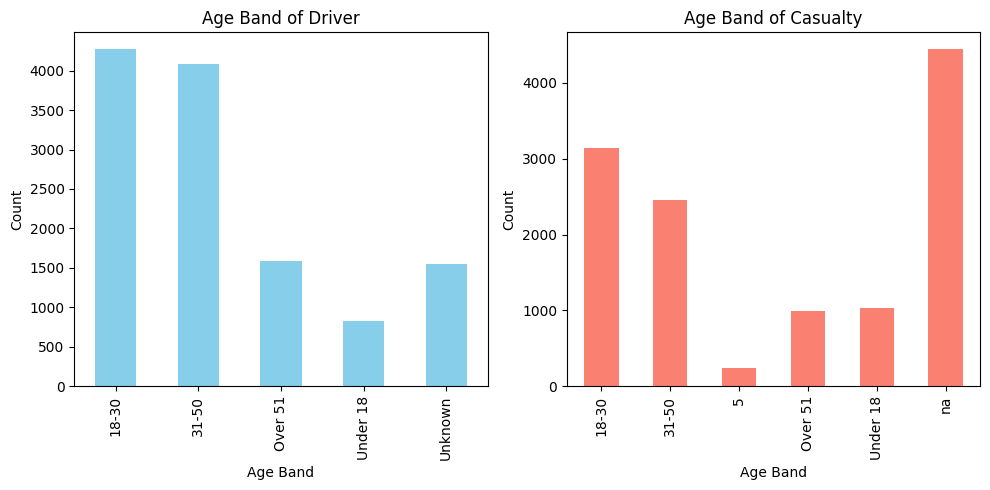

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['Age_band_of_driver'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Age Band of Driver')
plt.xlabel('Age Band')
plt.ylabel('Count')

# 绘制'Age_band_of_casualty'的条形图
plt.subplot(1, 2, 2)
df['Age_band_of_casualty'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('Age Band of Casualty')
plt.xlabel('Age Band')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

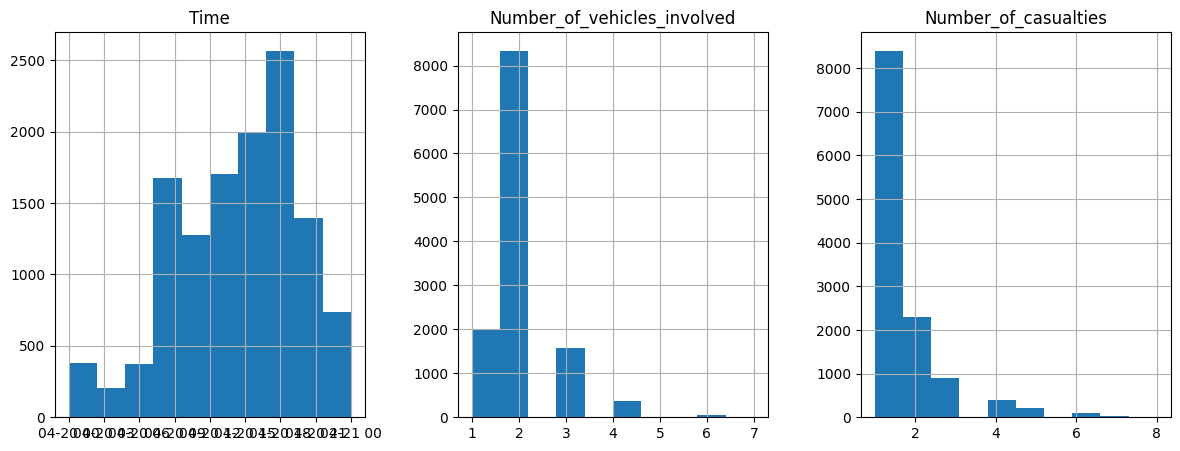

In [9]:
df.hist(layout=(1,6), figsize=(30,5))
plt.show()

In [10]:
df['Number_of_casualties'].value_counts()

Number_of_casualties
1    8397
2    2290
3     909
4     394
5     207
6      89
7      22
8       8
Name: count, dtype: int64

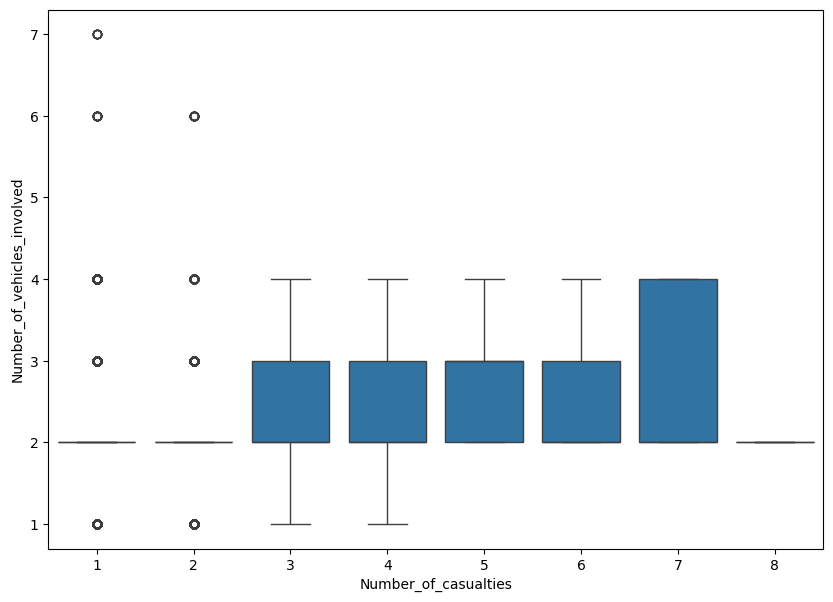

In [11]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, y='Number_of_vehicles_involved', x='Number_of_casualties')
plt.show()

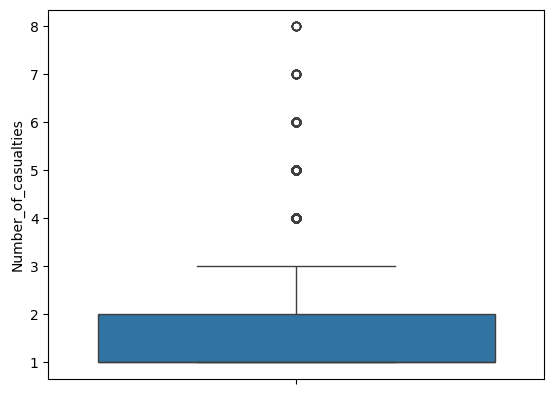

In [12]:
sns.boxplot(data=df, y='Number_of_casualties')
plt.show()

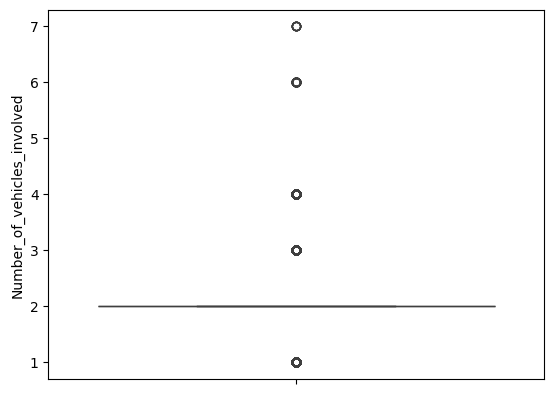

In [13]:
sns.boxplot(data=df, y='Number_of_vehicles_involved')
plt.show()

In [15]:
df['Number_of_vehicles_involved']

0        2
1        2
2        2
3        2
4        2
        ..
12311    2
12312    2
12313    1
12314    2
12315    2
Name: Number_of_vehicles_involved, Length: 12316, dtype: int64

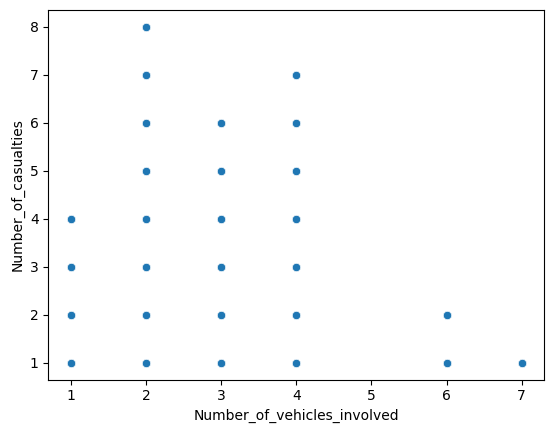

In [16]:
sns.scatterplot(x=df['Number_of_vehicles_involved'], y=df['Number_of_casualties'])
plt.show()

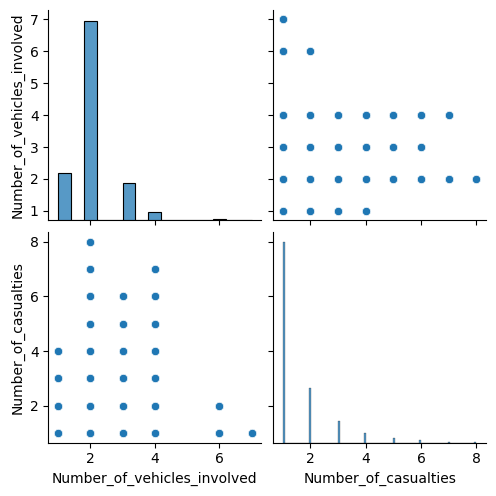

In [17]:
sns.pairplot(df[['Number_of_vehicles_involved','Number_of_casualties']])
plt.show()

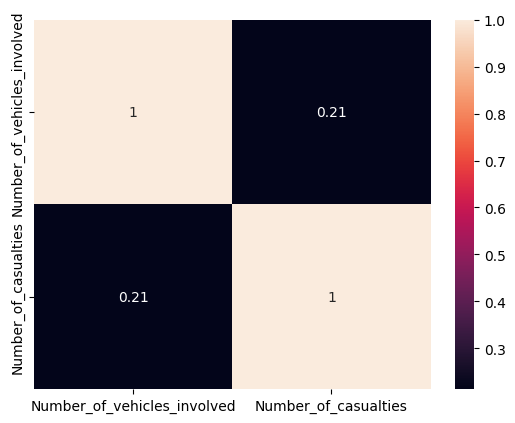

In [18]:
correlation_matrix = df[['Number_of_vehicles_involved','Number_of_casualties']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

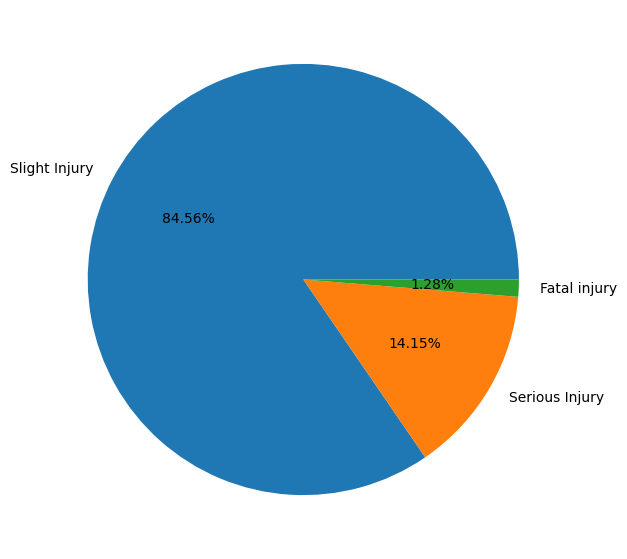

In [19]:
plt.figure(figsize=(10,7))
plt.pie(x=df['Accident_severity'].value_counts().values,
        labels=df['Accident_severity'].value_counts().index,
        autopct='%2.2f%%')
plt.show()

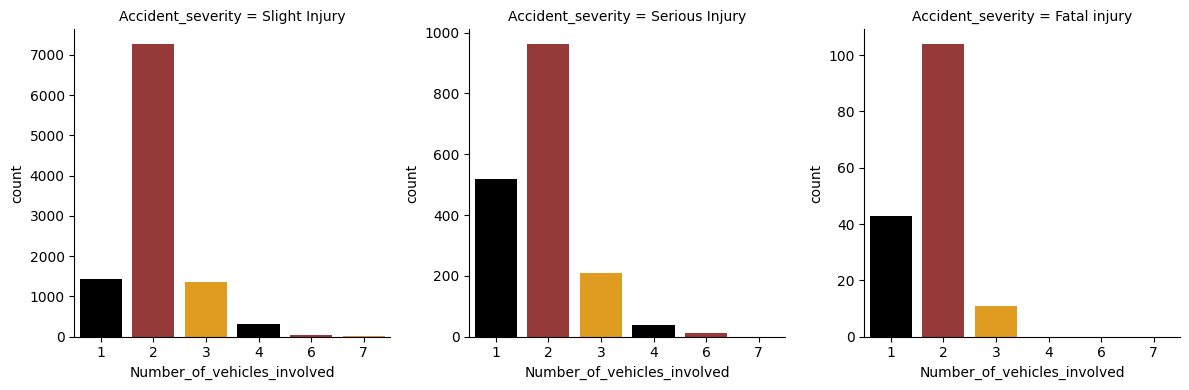

In [20]:
# creating a facet grid with columns as survived=0 and survived=1
grid = sns.FacetGrid(data=df, col='Accident_severity', height=4, aspect=1, sharey=False)
# mapping bar plot and the data on to the grid
grid.map(sns.countplot, 'Number_of_vehicles_involved', palette=['black', 'brown', 'orange'])
plt.show()

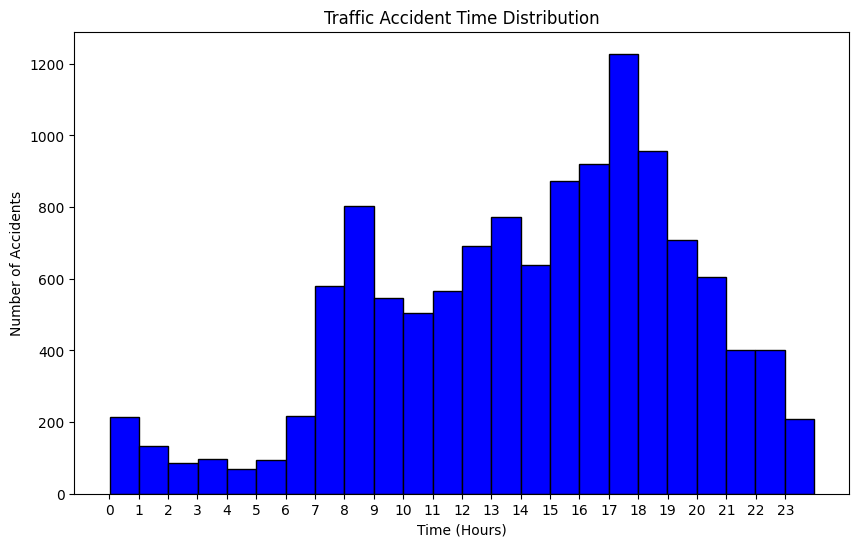

In [22]:
df['TimeInSeconds'] = df['Time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)


plt.figure(figsize=(10,6))
plt.hist(df['TimeInSeconds'], bins=24, color='blue', edgecolor='black')
plt.title('Traffic Accident Time Distribution')
plt.xlabel('Time (Hours)')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24 * 3600, 3600), range(24))
plt.show()

In [23]:
# dropping columns that can cause imbalance while imputation
lists=['Vehicle_driver_relation', 'Work_of_casuality', 'Fitness_of_casuality','Day_of_week','Casualty_severity','Time','Sex_of_driver','Educational_level','Defect_of_vehicle','Owner_of_vehicle','Service_year_of_vehicle', 'Road_surface_type','Sex_of_casualty']
df.drop(columns = lists, inplace=True)

In [24]:
df.shape

(12316, 20)

In [25]:
df.columns

Index(['Age_band_of_driver', 'Driving_experience', 'Type_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Age_band_of_casualty',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity',
       'TimeInSeconds'],
      dtype='object')

In [26]:
# fill missing values with mean column values
df['Driving_experience'].fillna(df['Driving_experience'].mode()[0], inplace=True)
df['Age_band_of_driver'].fillna(df['Age_band_of_driver'].mode()[0], inplace=True)
df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode()[0], inplace=True)
df['Area_accident_occured'].fillna(df['Area_accident_occured'].mode()[0], inplace=True)
df['Road_allignment'].fillna(df['Road_allignment'].mode()[0], inplace=True)
df['Type_of_collision'].fillna(df['Type_of_collision'].mode()[0], inplace=True)
df['Vehicle_movement'].fillna(df['Vehicle_movement'].mode()[0], inplace=True)
df['Lanes_or_Medians'].fillna(df['Lanes_or_Medians'].mode()[0], inplace=True)
df['Types_of_Junction'].fillna(df['Types_of_Junction'].mode()[0], inplace=True)

In [27]:
df.isnull().sum()

Age_band_of_driver             0
Driving_experience             0
Type_of_vehicle                0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Age_band_of_casualty           0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
TimeInSeconds                  0
dtype: int64

Class 0: 10415
Class 1: 1743
Proportion: 5.98 : 1


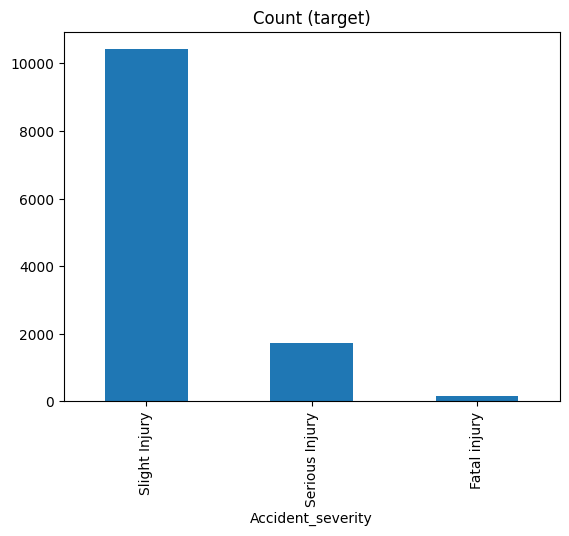

In [28]:
target_count = df['Accident_severity'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [29]:
from sklearn.preprocessing import LabelEncoder           #or one hot encoder
LE = LabelEncoder()
df=df.apply(LE.fit_transform)                            #categorical values to integers

<Axes: >

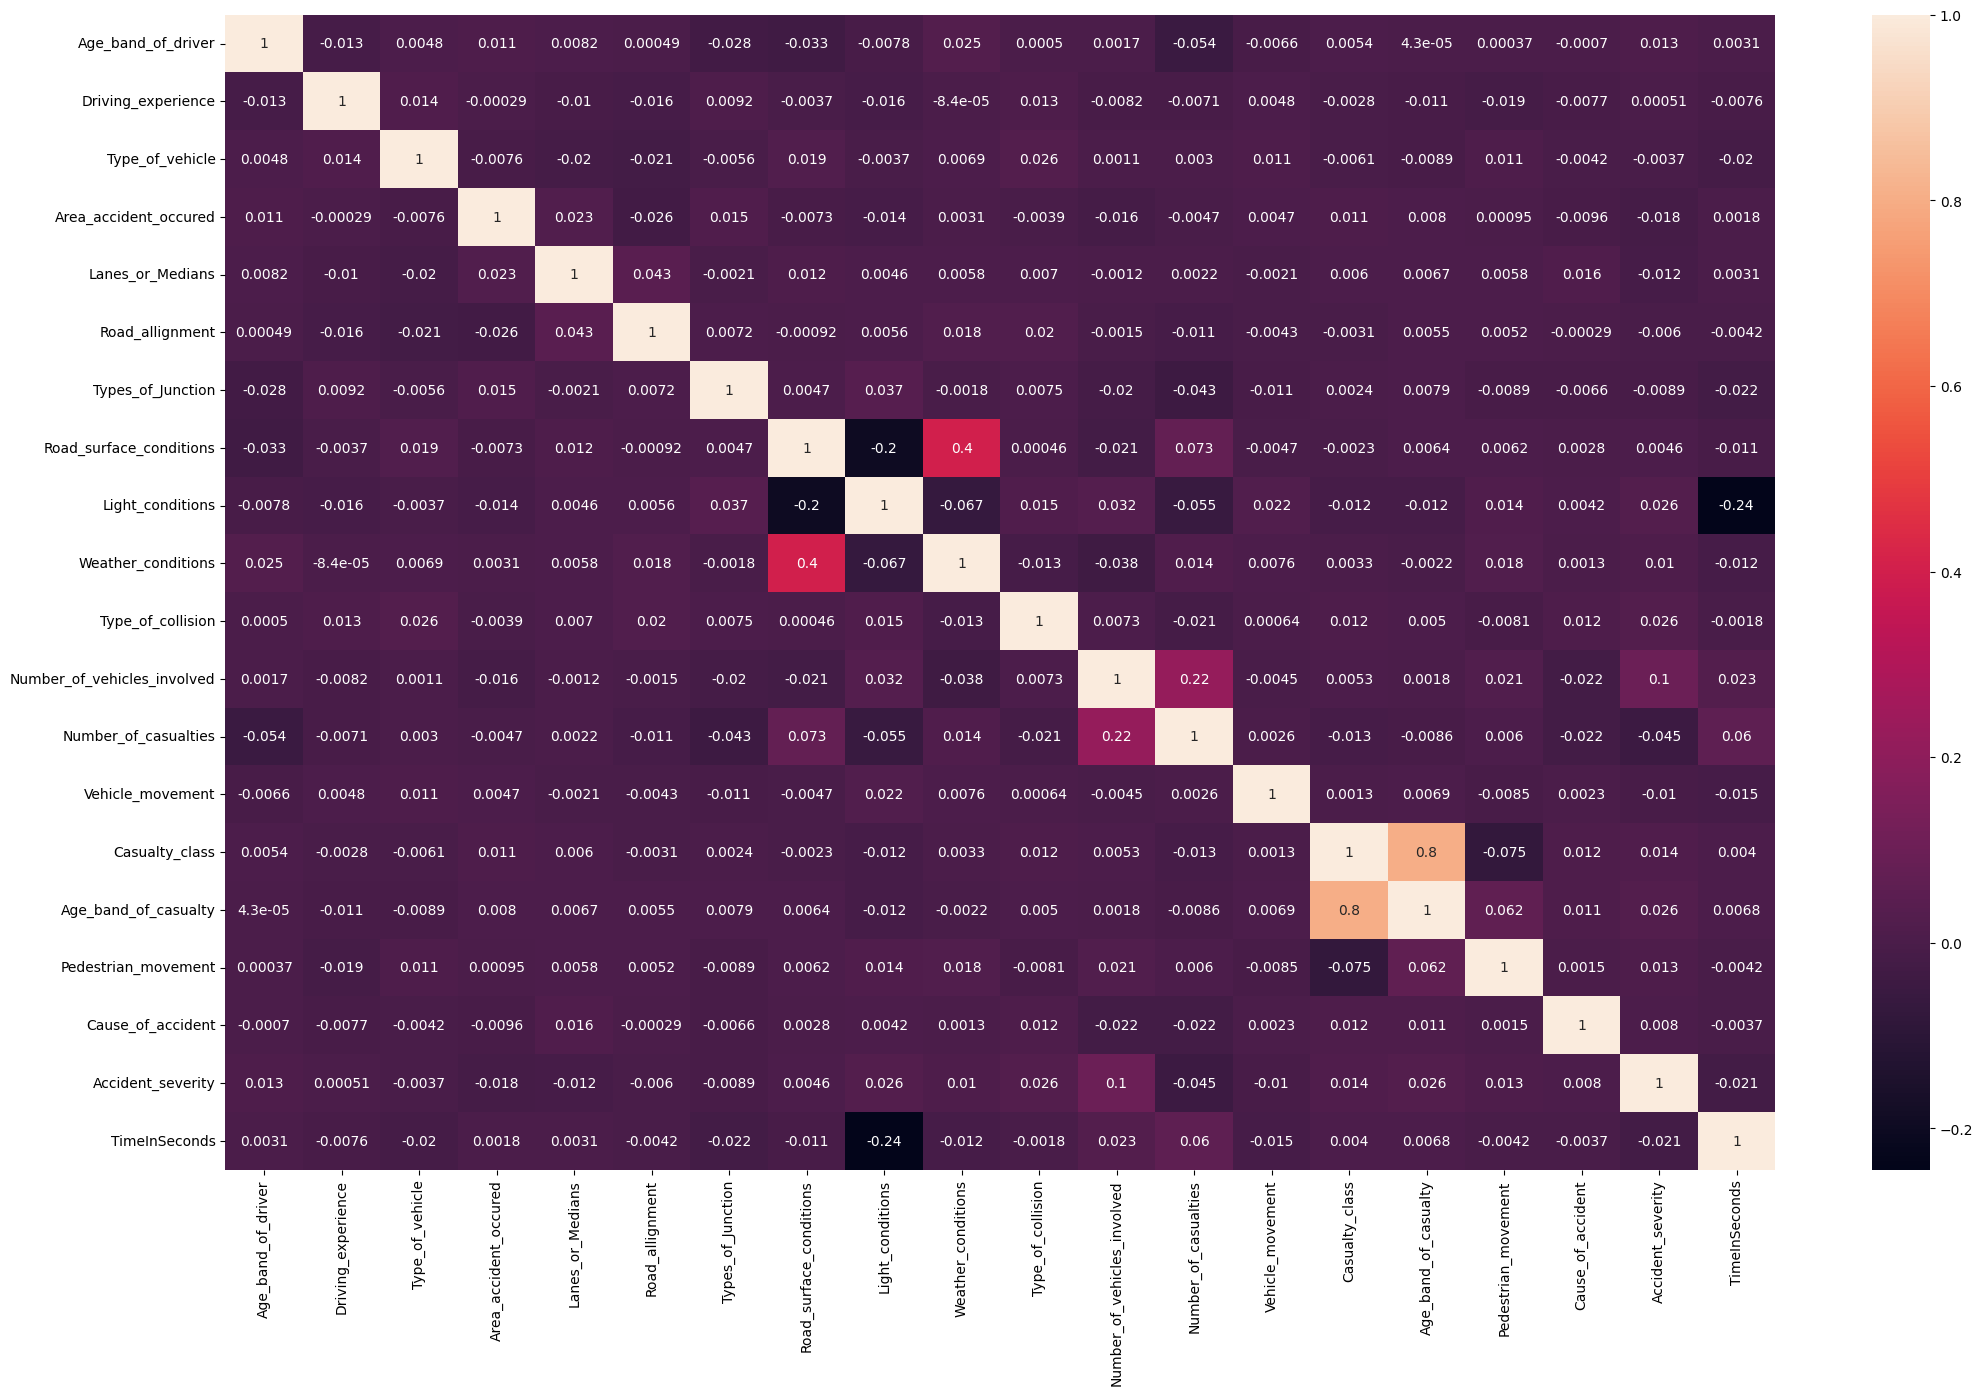

In [30]:
plt.figure(figsize=[25,15])
sns.heatmap(df.corr(),annot=True)

In [31]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() <= 22:
        sns.countplot(y=col, data=df)
        plt.show()

In [32]:
x = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(8621, 19) (3695, 19) (8621,) (3695,)


In [33]:
# upsampling using smote

counter = Counter(ytrain)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(ytrain)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
xtrain, ytrain = oversample.fit_resample(xtrain, ytrain)

counter = Counter(ytrain)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(ytrain)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", xtrain.shape, ytrain.shape)

Class= 2, n=7324 (84.96%)
Class= 1, n=1191 (13.82%)
Class= 0, n=106 (1.23%)
Class= 2, n=7324 (33.33%)
Class= 1, n=7324 (33.33%)
Class= 0, n=7324 (33.33%)
Upsampled data shape:  (21972, 19) (21972,)


In [34]:
x=df.drop(columns=["Accident_severity"])
y=df["Accident_severity"]

In [35]:
# models={"LogisticRegression":LogisticRegression(),
#         "DecisionTreeClassifier":DecisionTreeClassifier(),
#         "SVM":SVC(),
#         "KNeighborsClassifier":KNeighborsClassifier(),
#         "GNB":GaussianNB(),
#        "RandomForestClassifier":RandomForestClassifier(),
#         "AdaBoostClassifier":AdaBoostClassifier(),
#         "GradientBoostingClassifier":GradientBoostingClassifier(),
#         }
from sklearn.multiclass import OneVsRestClassifier
models = {
    "LogisticRegression": OneVsRestClassifier(LogisticRegression(C=1.0, solver='liblinear', penalty='l2')),
    "DecisionTreeClassifier": OneVsRestClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)),
    "KNeighborsClassifier": OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5, weights='distance', p=2)),
    "RandomForestClassifier": OneVsRestClassifier(RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=8)),
    "AdaBoostClassifier": OneVsRestClassifier(AdaBoostClassifier(n_estimators=200,learning_rate=0.1)),
    "GradientBoostingClassifier": OneVsRestClassifier(GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5))
}

def plt_auc(ytest,ypred_proba):
    # 计算每个类别的FPR, TPR和阈值
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):  # 对于三个类别
        fpr[i], tpr[i], _ = roc_curve(ytest == i, ypred_proba[:, i])
        #roc_auc[i] = auc(fpr[i], tpr[i])
        roc_auc[i] = roc_auc_score(ytest == i, ypred_proba[:, i])

    # 绘制所有类别的ROC曲线
    plt.figure(figsize=(10, 6))
    for i, color in zip(range(3), ['aqua', 'darkorange', 'cornflowerblue']):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

============================ LogisticRegression ================================
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.00      0.00      0.00       537
           2       0.84      1.00      0.91      3107

    accuracy                           0.84      3695
   macro avg       0.28      0.33      0.30      3695
weighted avg       0.71      0.84      0.77      3695

macro-AUC: 0.6213067642957238
weighted-AUC: 0.5778686446039931 



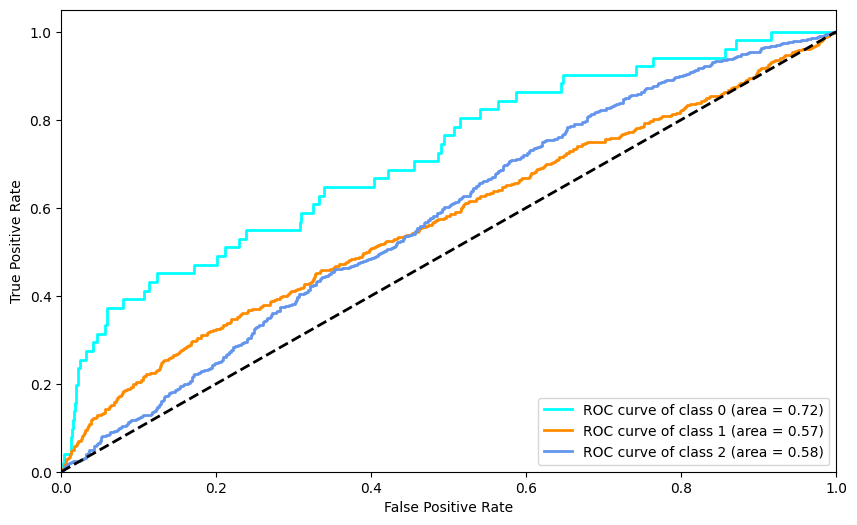

============================ DecisionTreeClassifier ================================
              precision    recall  f1-score   support

           0       0.83      0.10      0.18        51
           1       0.53      0.02      0.04       537
           2       0.84      1.00      0.91      3107

    accuracy                           0.84      3695
   macro avg       0.73      0.37      0.38      3695
weighted avg       0.80      0.84      0.78      3695

macro-AUC: 0.6792863278673856
weighted-AUC: 0.620070910304444 



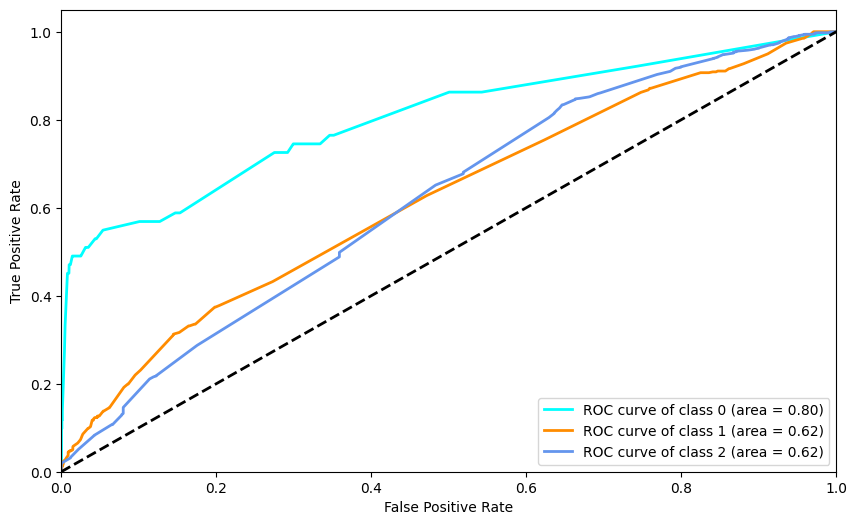

============================ KNeighborsClassifier ================================
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.15      0.02      0.04       537
           2       0.84      0.98      0.90      3107

    accuracy                           0.83      3695
   macro avg       0.33      0.33      0.31      3695
weighted avg       0.73      0.83      0.77      3695

macro-AUC: 0.5631938253966587
weighted-AUC: 0.558606823502534 



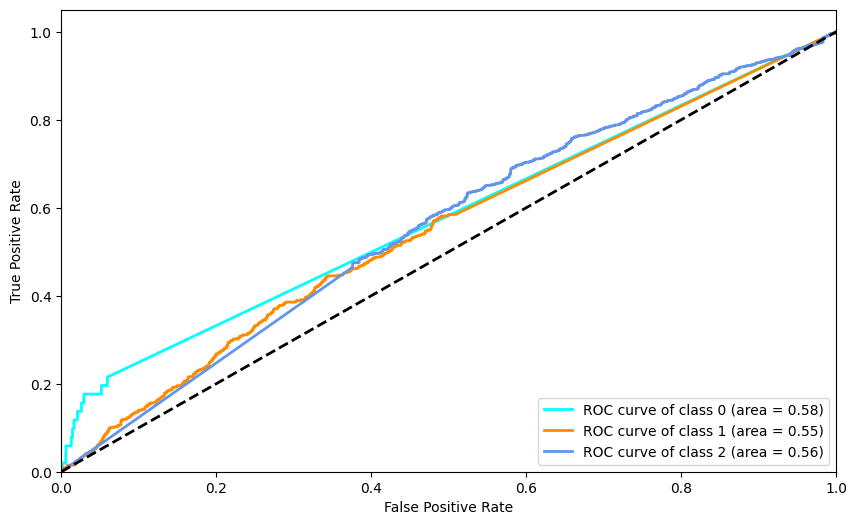

============================ RandomForestClassifier ================================
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       1.00      0.00      0.00       537
           2       0.84      1.00      0.91      3107

    accuracy                           0.84      3695
   macro avg       0.61      0.33      0.31      3695
weighted avg       0.85      0.84      0.77      3695

macro-AUC: 0.7304609737465525
weighted-AUC: 0.6729590705457565 



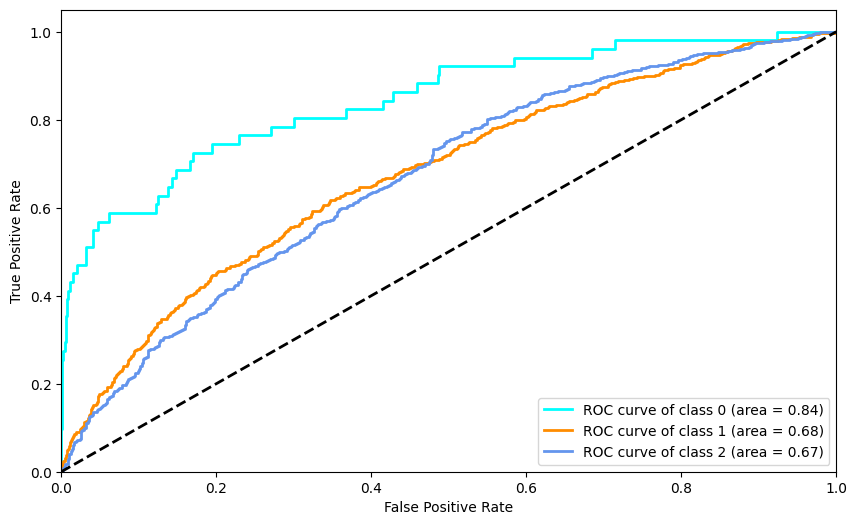

============================ AdaBoostClassifier ================================
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.00      0.00      0.00       537
           2       0.84      1.00      0.91      3107

    accuracy                           0.84      3695
   macro avg       0.28      0.33      0.30      3695
weighted avg       0.71      0.84      0.77      3695

macro-AUC: 0.6680061303289714
weighted-AUC: 0.6169814922826339 



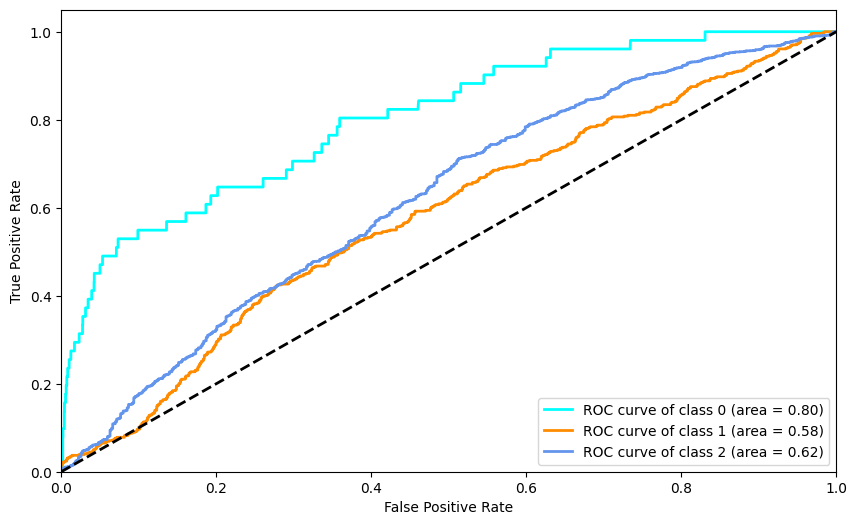

============================ GradientBoostingClassifier ================================
              precision    recall  f1-score   support

           0       0.73      0.22      0.33        51
           1       0.72      0.09      0.16       537
           2       0.85      0.99      0.92      3107

    accuracy                           0.85      3695
   macro avg       0.77      0.43      0.47      3695
weighted avg       0.83      0.85      0.80      3695

macro-AUC: 0.7874681858007975
weighted-AUC: 0.7236972863108542 



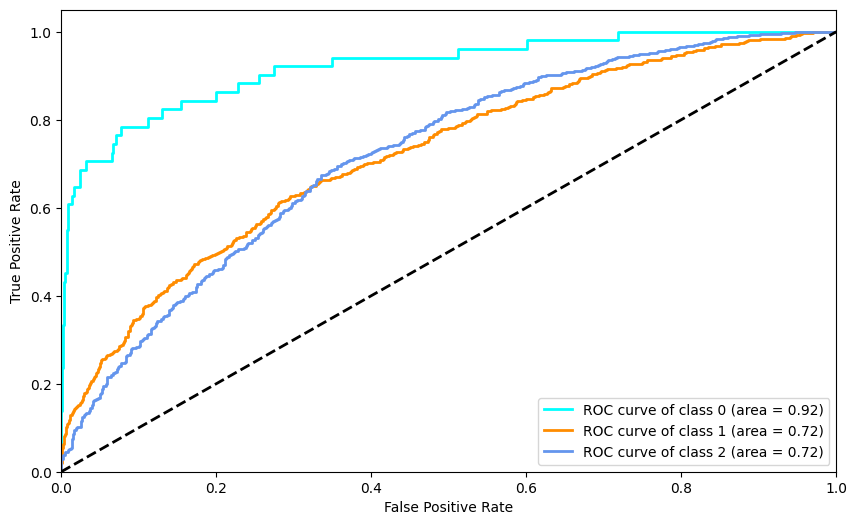

In [36]:
from sklearn.metrics import classification_report
# models,x,y,scaleFlag=0,1,2
def modelAccuracy(models,x,y,scaleFlag):
    #train/Test
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)
    acc_result={}
    for name,model in models.items():
        #pipeline
        #1.Transformer -> 2.Model
        print("============================",name,"================================")
        if(scaleFlag==1):
            model_pipeline=Pipeline([('MinMaxScler',MinMaxScaler()),('model',model)])
        elif(scaleFlag==2):
             model_pipeline=Pipeline([('StandardScaler',StandardScaler()),('model',model)])
        else:
            model_pipeline=Pipeline([('model',model)])
        #training/testing on model pipeline
        model_fit=model_pipeline.fit(xtrain,ytrain)
        ypred=model_fit.predict(xtest)
        ypred_proba=model_fit.predict_proba(xtest)
        ypred_proba = np.nan_to_num(ypred_proba, nan=1/3)

        print(classification_report(ytest,ypred))
        auc =  roc_auc_score(ytest, ypred_proba, multi_class='ovr', average='macro')
        print("macro-AUC:",auc)
        auc =  roc_auc_score(ytest, ypred_proba, multi_class='ovr', average='weighted')
        print("weighted-AUC:",auc,"\n")
        plt_auc(ytest,ypred_proba)

        #acc_result[name]=acc
    return acc_result

acc=modelAccuracy(models,x,y,1)